In [1]:
import numpy as np
import matplotlib.pyplot as plt 
#from skimage import filters
import scipy
import os
import pandas as pd
from collections import Counter
import json
import re
from scipy import stats, signal

In [2]:

CVs={}
#area	0.42	cm^2 
constant=2.69E+05
nelectrons=1 #	e
Diffusion=  7.20E-06# ferrocene cm^2/s
Concentration=5.00E-06#ferrocene mol/cm^3
#speed	3.00E+00	volts/s


areaConstant = constant*(nelectrons**1.5)*(Diffusion**0.5)*Concentration
areaConstant

0.0036090137156846607

dirs = os.listdir( r"D:\DataTemp\20220309_T006_TEE_HOH\20220309 T006 TEETAT HOH Test\T006_TEETAT_HOH_200mv_20mvs\Voltammogram" )
dirs

In [18]:
folder=r"C:\Users\bashc\Desktop\Brians_CVs_biotincys\FC_Cyst\Voltammogram" 
dirs = os.listdir( folder )
print(dirs)
i=0
Areas ={
    'TETA':.25*.58,
    'LacticOnly':.25*.81
}

for file in dirs:
        if 'csv' in file:
            print(file)
            cv=pd.read_csv(folder + "/" + file ) 
            f=file.split('.')[0]
            f=f.replace(' ','_')
            print(f)
            if f in Areas:
                area=Areas[f]*1e-4
            else:
                area = .25*1e-4

            cv["J"]=cv["Current (A)"]/area
            cv=cv.rename(columns={"Current (A)":"Current"})
            cv=cv.rename(columns={"Potential (V)":"Potential"})
            if not ('TEETAT' in f):
                cv['Potential']=cv['Potential']+.08
            CVs[f]=cv
  
 

['FC_Cyst_.csv']
FC_Cyst_.csv
FC_Cyst_


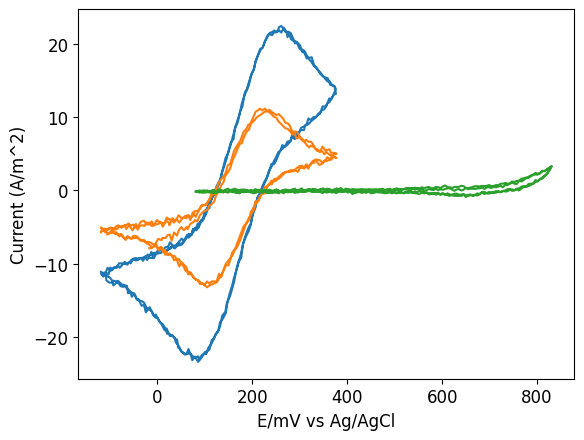

In [19]:
for cvName in CVs:
    cv=CVs[cvName]
    plt.plot(cv.Potential*1000,cv.J)
    
plt.title="All CVs"
plt.xlabel("E/mV vs Ag/AgCl")
plt.ylabel("Current (A/m^2)")
def annot_max(x,y,text,dir, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()

    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="data",              arrowprops=arrowprops, bbox=bbox_props, ha="left", va="top")
    if dir>0:
        ax.annotate(text, xy=(xmax, ymax), xytext=(xmax-.1,ymax+.5), **kw)
    else:
        ax.annotate(text, xy=(xmax, ymax), xytext=(xmax+.02,ymax+.5), **kw)

Current_vs_Potential


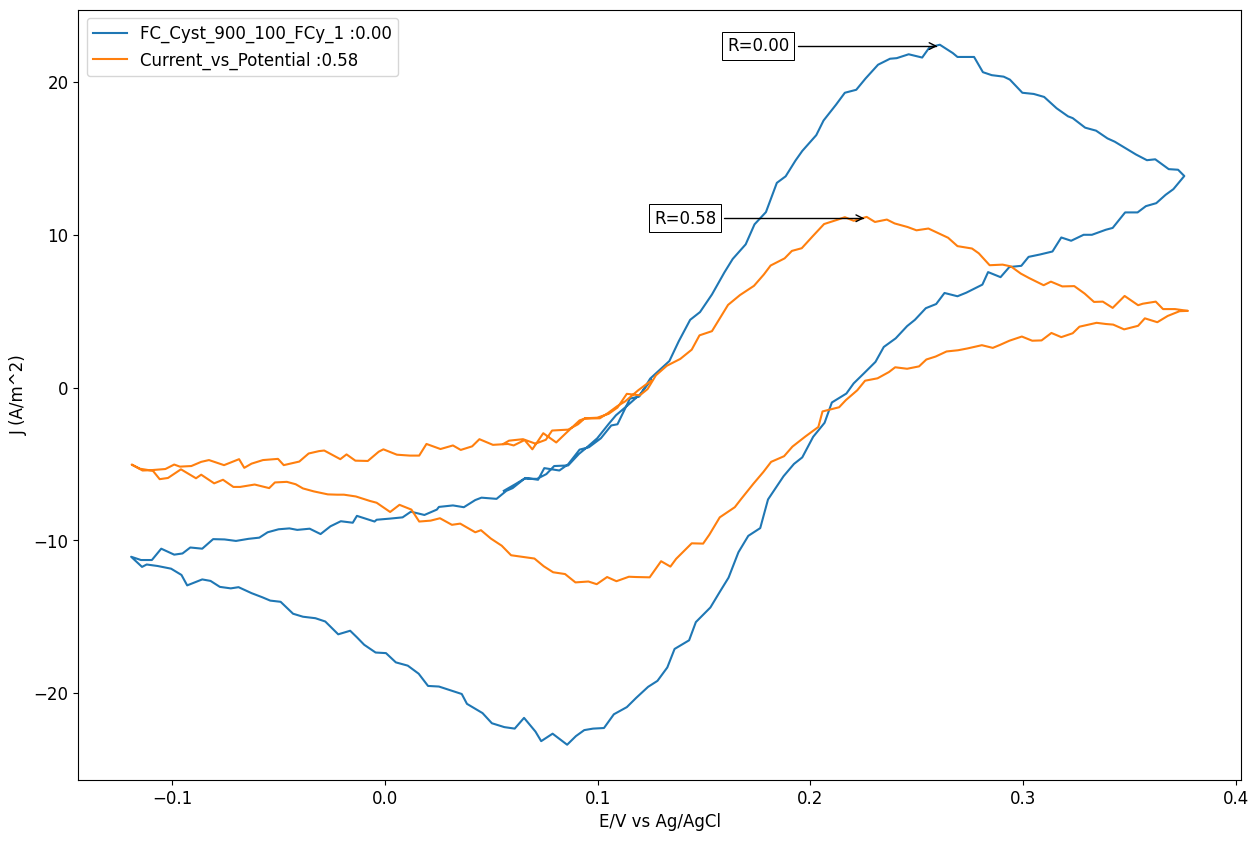

In [17]:
speed=40
vel=(speed/1000)**0.5

        
plt.figure    (figsize=(15,10))        
cc=1
for cvName in CVs:
    cv=CVs[cvName]
    x1=cv.Potential
    y1=cv.J
    if cvName=='TEETAT_JUST_TE_REPEAT':
        label="TE_only 7cm strip"
    else:
        label=cvName
        
   
    cvl=cv#.loc[cv.Segment == 3]
    #plt.plot(cvl.Potential,cvl.J,label=cvName)

    boring2 = cvl.loc[ cv.Potential<0.2]
    boring3 = boring2.loc[ cv.Potential>.15]

    #plt.plot(boring3.Potential,boring3.J,label=cvName)

    res = stats.linregress(boring3.Potential, boring3.J)
    yMax =np.max(cvl.J)
    xMax= cvl.Potential.iloc[np.argmax(cvl.J)]
    baseline =yMax-( res.slope*xMax+res.intercept)
    t=baseline/vel/areaConstant*0.0001
    #plt.plot(cvl.Potential,res.slope*cvl.Potential+res.intercept)
    if t<0:
        t=0
    text= "%.2f A/m^2 @ %.3fV : R=%.2f"%(baseline, xMax, t)
    text= "R=%.2f"%( t)
    plt.plot(x1[int(len(x1)/2):],y1[int(len(x1)/2):],label=label + " :%.2f"%(t))
    
    
    annot_max(x1,y1,text,(cc) % 3)
    cc=cc+1
    
print(label)
plt.rc('font', size=12)
plt.title="label"
plt.xlabel("E/V vs Ag/AgCl")
plt.ylabel("J (A/m^2)")        
plt.legend(loc='upper left')
plt.show()

In [12]:
folder=r"D:\DataTemp\20220309_T006_TEE_HOH\20220318_TiAuTiBiotinFunc\TEETAT_35minRinse_Biotindithiol_SB_200mv_60mvs\Voltammogram" 
dirs = os.listdir( folder )

i=0
Areas ={
    'Step_Rinse':.75,
    'Step_1':.75,
    'Step_2':.75,
}

for file in dirs:
        if 'csv' in file:
            cv=pd.read_csv(folder + "/" + file ) 
            f=file.split('.')[0]
            f=f.replace(' ','_')
            print(f)
            area=Areas[f]*1e-4

            cv["J"]=cv["Current (A)"]/area
            cv=cv.rename(columns={"Current (A)":"Current"})
            cv=cv.rename(columns={"Potential (V)":"Potential"})
            if not ('TEETAT' in f):
                cv['Potential']=cv['Potential']+.08
            CVs[f]=cv
cv      

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\DataTemp\\20220309_T006_TEE_HOH\\20220318_TiAuTiBiotinFunc\\TEETAT_35minRinse_Biotindithiol_SB_200mv_60mvs\\Voltammogram'

Step_1
Step_2
Step_Rinse


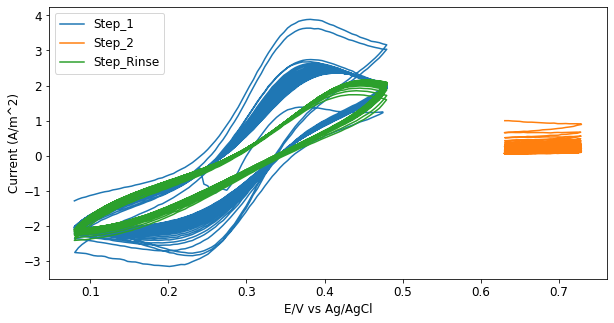

Text(0, 0.5, 'R (Active/Physical)')

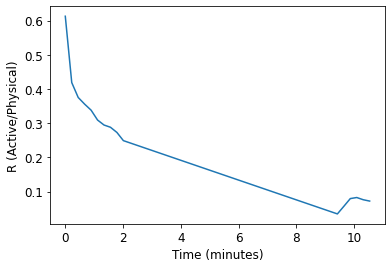

In [78]:
speed=20
vel=(speed/1000)**0.5

        
plt.figure    (figsize=(10,5))        
cc=1
areas=[]
xs=[]
for cvName in CVs:
    print(cvName)
    cv=CVs[cvName]
    x1=cv.Potential
    y1=cv.J
    label=cvName
        
    plt.plot(cv.Potential,cv.J,label=label)
    cc=0
    for i in range(3,np.max(cv.Segment),6):
        cvl=cv.loc[cv.Segment == i]
        boring2 = cvl.loc[ cv.Potential<0.2]
        boring3 = boring2.loc[ cv.Potential>.1]
        #plt.plot(boring3.Potential,boring3.J,label=label)
        if (len(boring3)>0):
            res = stats.linregress(boring3.Potential, boring3.J)
            yMax =np.max(cvl.J)
            xMax= cvl.Potential.iloc[np.argmax(cvl.J)]
            baseline =yMax-( res.slope*xMax+res.intercept)
            t=baseline/vel/areaConstant*0.0001
            areas.append(t)
            if cvName=='Step_1':
                xs.append(cc*0.22333333333333333)
            else:
                xs.append(cc*0.22333333333333333+9.416666666666668)
            cc=cc+1
     
    
plt.rc('font', size=12)
plt.title="All CVs"
plt.xlabel("E/V vs Ag/AgCl")
plt.ylabel("Current (A/m^2)")        
plt.legend(loc='upper left')
plt.show()
plt.plot(xs,areas)
plt.xlabel("Time (minutes)")
plt.ylabel("R (Active/Physical)")     

In [ ]:
vFilter =['300mv_','20mvs',"_TA"]
selected=[]
for cvName in CVs:
    filtered=True
    for filt in vFilter:
        
        if not (filt in cvName):
            filtered=False
    if filtered:
        selected.append(cvName)
print(selected)        
plt.figure    (figsize=(20,10))        
for cvName in selected:
    cv=CVs[cvName]
    x1=cv.Potential
    y1=cv.J
    plt.plot(x1,y1,label=cvName)
    cvl=cv.loc[cv.Segment == 3]
    #plt.plot(cvl.Potential,cvl.J,label=cvName)

    boring2 = cvl.loc[ cv.Potential<0.05]
    boring3 = boring2.loc[ cv.Potential>-.05]

    #plt.plot(boring3.Potential,boring3.J,label=cvName)

    res = stats.linregress(boring3.Potential, boring3.J)
    yMax =np.max(cvl.J)
    xMax= cvl.Potential.iloc[np.argmax(cvl.J)]
    baseline =yMax-( res.slope*xMax+res.intercept)
    #plt.plot(cvl.Potential,res.slope*cvl.Potential+res.intercept)
    text= "%.2f A/m^2 @  %.2fV"%(baseline, xMax)
    
    
    annot_max(x1,y1,text)
    
    

plt.title="All CVs"
plt.xlabel("E/V vs Ag/AgCl")
plt.ylabel("Current (A/m^2)")        
plt.legend()

In [ ]:
vFilter =['300mv_','100mvs',"_TA"]
selected=[]
for cvName in CVs:
    filtered=True
    for filt in vFilter:
        
        if not (filt in cvName):
            filtered=False
    if 'BIO' in cvName:
        filtered=False
    if filtered:
        selected.append(cvName)
    if cvName =='KOH_EC_300mv_100mvs':
        selected.append(cvName)
    
plt.figure    (figsize=(10,5))        
cc=0
"""Flame Annealed	None	Timeetch"""
coverage=[0.95,0,0.83,0.83]

for cvName in selected:
    cv=CVs[cvName]
    x1=cv.Potential
    y1=cv.J

    cvl=cv.loc[cv.Segment == 3]
    #plt.plot(cvl.Potential,cvl.J,label=cvName)

    boring2 = cvl.loc[ cv.Potential<0.05]
    boring3 = boring2.loc[ cv.Potential>-.05]

    #plt.plot(boring3.Potential,boring3.J,label=cvName)

    res = stats.linregress(boring3.Potential, boring3.J)
    yMax =np.max(cvl.J)
    xMax= cvl.Potential.iloc[np.argmax(cvl.J)]
    baseline =yMax-( res.slope*xMax+res.intercept)
    #plt.plot(cvl.Potential,res.slope*cvl.Potential+res.intercept)
    #text= (r"%.2f $A/m^{2}$, C=%.0f%%, E=%.2fV")%(baseline,coverage[cc]*100, xMax)
    
    plt.plot(x1,y1,label=cvName)
    #annot_max(x1,y1,text)
    cc+=1
    
    

plt.title="All CVs"
plt.xlabel("E/V vs Ag/AgCl")
plt.ylabel("Current (A/m^2)")        
plt.legend()

In [ ]:
vFilter =['300mv_','100mvs',"_TA"]
selected=[]
for cvName in CVs:
    if cvName =='Blank_60mV':
        selected.append(cvName)
    if cvName =='Biotin pH13_60mV':
        selected.append(cvName)
    if cvName =='Biotin A_60mV':
        selected.append(cvName)        
        
plt.figure    (figsize=(10,5))        
cc=0
"""Flame Annealed	None	Timeetch"""
coverage=[0.95,0,0.83,0.83]

for cvName in selected:
    cv=CVs[cvName]
    x1=cv.Potential
    y1=cv.J

    cvl=cv.loc[cv.Segment == 3]
    #plt.plot(cvl.Potential,cvl.J,label=cvName)

    boring2 = cvl.loc[ cv.Potential<0.05]
    boring3 = boring2.loc[ cv.Potential>-.05]

    #plt.plot(boring3.Potential,boring3.J,label=cvName)

    res = stats.linregress(boring3.Potential, boring3.J)
    yMax =np.max(cvl.J)
    xMax= cvl.Potential.iloc[np.argmax(cvl.J)]
    baseline =yMax-( res.slope*xMax+res.intercept)
    #plt.plot(cvl.Potential,res.slope*cvl.Potential+res.intercept)
    #text= (r"%.2f $A/m^{2}$, C=%.0f%%, E=%.2fV")%(baseline,coverage[cc]*100, xMax)
    
    plt.plot(x1,y1,label=cvName)
    #annot_max(x1,y1,text)
    cc+=1
    
    

plt.title="All CVs"
plt.xlabel("E/V vs Ag/AgCl")
plt.ylabel("Current (A/m^2)")        
plt.legend()

In [ ]:
def annot_max(x,y,xmax,ymax,text, ax=None):


    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="data",
              arrowprops=arrowprops, bbox=bbox_props, ha="left", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(xmax-.1,ymax+.1), **kw)

#TEE_TAT_100mV_100mvs
vFilter =["TEE_TAT",'500mV']
selected=[]
for cvName in CVs:
    filtered=True
    for filt in vFilter:
        
        if not (filt in cvName):
            filtered=False
    if filtered:
        selected.append(cvName)
plt.figure    (figsize=(20,10))        
cc=0
"""Flame Annealed	None	Timeetch"""
coverage=[0.19,0.13]

for cvName in selected:
    cv=CVs[cvName]
    x1=cv.Potential
    y1=cv.J

    cvl=cv.loc[cv.Segment == 3]
    #plt.plot(cvl.Potential,cvl.J,label=cvName)

    boring2 = cvl.loc[ cv.Potential<0.25]
    boring3 = boring2.loc[ cv.Potential>0.2]

    #plt.plot(boring3.Potential,boring3.J,label=cvName)

    res = stats.linregress(boring3.Potential, boring3.J)
    yMax =np.max(cvl.J)
    xMax=.45# cvl.Potential.iloc[np.argmax(cvl.J)]
    baseline =yMax-( res.slope*xMax+res.intercept)
    #plt.plot(cvl.Potential,res.slope*cvl.Potential+res.intercept)
    text= (r"%.2f $A/m^{2}$, C=%.0f%%, E=%.2fV")%(baseline,coverage[cc]*100, xMax)
    
    plt.plot(x1,y1,label=cvName)
    annot_max(x1,y1,xMax,yMax,text)
    cc+=1
    
    

plt.title="All CVs"
plt.xlabel("E/V vs Ag/AgCl")
plt.ylabel("Current (A/m^2)")        
plt.legend()

In [ ]:
def annot_max(x,y,text, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()

    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="data",
              arrowprops=arrowprops, bbox=bbox_props, ha="left", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(xmax-.1,ymax+.5), **kw)
    
    xmax = x[np.argmin(y)]
    ymax = y.min()

    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="data",
              arrowprops=arrowprops, bbox=bbox_props, ha="left", va="top")
    text= (r"E=%.2fV")%( xmax)
    ax.annotate(text, xy=(xmax, ymax), xytext=(xmax+.1,ymax+.5), **kw)    

vFilter =['300mv_',"TE_TA"]
selected=[]
for cvName in CVs:
    filtered=True
    for filt in vFilter:
        
        if not (filt in cvName):
            filtered=False
    if filtered:
        selected.append(cvName)
plt.figure    (figsize=(20,10))        
cc=0
"""Flame Annealed	None	Timeetch"""
coverage=[0.95,0,0.83,0.83]

for cvName in selected:
    cv=CVs[cvName]
    x1=cv.Potential
    y1=cv.J

    cvl=cv.loc[cv.Segment == 3]
    #plt.plot(cvl.Potential,cvl.J,label=cvName)

    boring2 = cvl.loc[ cv.Potential<0.05]
    boring3 = boring2.loc[ cv.Potential>-.05]

    #plt.plot(boring3.Potential,boring3.J,label=cvName)

    res = stats.linregress(boring3.Potential, boring3.J)
    yMax =np.max(cvl.J)
    xMax= cvl.Potential.iloc[np.argmax(cvl.J)]
    baseline =yMax-( res.slope*xMax+res.intercept)
    #plt.plot(cvl.Potential,res.slope*cvl.Potential+res.intercept)
    text= (r"%.2f $A/m^{2}$,  E=%.2fV")%(baseline, xMax)
    
    plt.plot(x1,y1,label=cvName)
    annot_max(x1,y1,text)
    cc+=1
    
    

plt.title="All CVs"
plt.xlabel("E/V vs Ag/AgCl")
plt.ylabel("Current (A/m^2)")        
plt.legend()

In [ ]:
vFilter =["TE_TA",'20mvs']
selected=[]
for cvName in CVs:
    filtered=True
    for filt in vFilter:
        
        if not (filt in cvName):
            filtered=False
    if filtered:
        selected.append(cvName)
plt.figure    (figsize=(20,10))        
cc=0
"""Flame Annealed	None	Timeetch"""
coverage=[0.95,0,0.83,0.83]

for cvName in selected:
    cv=CVs[cvName]
    x1=cv.Potential
    y1=cv.J

    cvl=cv.loc[cv.Segment == 3]
    #plt.plot(cvl.Potential,cvl.J,label=cvName)

    boring2 = cvl.loc[ cv.Potential<0.05]
    boring3 = boring2.loc[ cv.Potential>-.05]

    #plt.plot(boring3.Potential,boring3.J,label=cvName)

   
    plt.plot(x1,y1,label=cvName)
    cc+=1
    
    

plt.title="All CVs"
plt.xlabel("E/V vs Ag/AgCl")
plt.ylabel("Current (A/m^2)")        
plt.legend()